In [ ]:
#Load Packages
import pandas as pd
import numpy as np

In [ ]:
#Load dataset
dataset = pd.read_csv("/content/weather.csv")
dataset.describe()

FileNotFoundError: ignored

In [ ]:
#Pandas dataframe to numpy array
data = dataset.values
print(data.shape)

(96453, 5)


In [ ]:
#Normalization
def Normalize(data):
  norm = data.copy()
  for col in range(data.shape[1]):
    norm[:,col] = (np.max(norm[:,col])- norm[:,col])/(np.max(norm[:,col])-np.min(norm[:,col]))
  return norm
data_norm = Normalize(data)

In [ ]:
#Seperate Input and Output
from sklearn.model_selection import train_test_split
X = data_norm[:,0:-1]
y = data_norm[:,-1]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 31)
print(X_train.shape , y_train.shape)


(77162, 4) (77162,)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 750)               3750      
                                                                 
 dense_1 (Dense)             (None, 750)               563250    
                                                                 
 dense_2 (Dense)             (None, 750)               563250    
                                                                 
 dense_3 (Dense)             (None, 750)               563250    
                                                                 
 dense_4 (Dense)             (None, 1)                 751       
                                                                 
Total params: 1,694,251
Trainable params: 1,694,251
Non-train

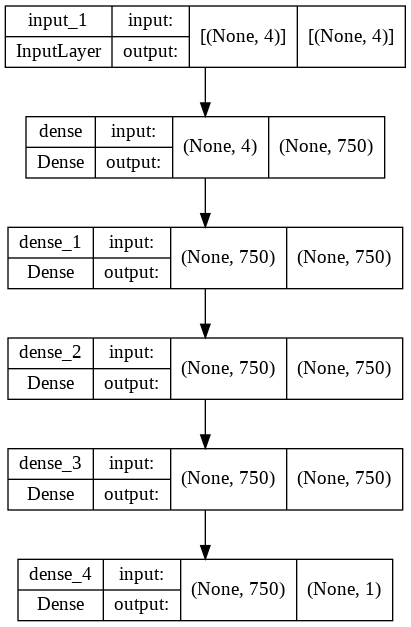

In [ ]:
#Model implemnation
from tensorflow.keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D, Dense
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2DTranspose
input_layer = Input(shape=(4,))
l1 = Dense(units=750,activation = "relu")(input_layer)
l2 = Dense(units=750,activation = "relu")(l1)
l3 = Dense(units=750,activation = "relu")(l2)
l4 = Dense(units=750,activation = "relu")(l3)
output = Dense(units=1,activation = "sigmoid")(l4)
model = Model(input_layer,output)
model.summary()
plot_model(model,show_shapes=True)

In [ ]:
#Compile Model
model.compile(optimizer=Adam(),loss="MSE",metrics = ["accuracy"])

model.fit(x=X_train,y=y_train,epochs=15,steps_per_epoch=10,validation_data=[X_test,y_test],validation_steps=10)

Epoch 1/15
10/10 [==============================] - 16s 1s/step - loss: 0.0181 - accuracy: 2.5919e-05 - val_loss: 0.0123 - val_accuracy: 0.0000e+00
Epoch 2/15
10/10 [==============================] - 12s 1s/step - loss: 0.0056 - accuracy: 2.5919e-05 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 3/15
10/10 [==============================] - 12s 1s/step - loss: 0.0015 - accuracy: 2.5919e-05 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 4/15
10/10 [==============================] - 11s 1s/step - loss: 9.2698e-04 - accuracy: 2.5919e-05 - val_loss: 5.9521e-04 - val_accuracy: 0.0000e+00
Epoch 5/15
10/10 [==============================] - 11s 1s/step - loss: 5.5808e-04 - accuracy: 2.5919e-05 - val_loss: 4.4930e-04 - val_accuracy: 0.0000e+00
Epoch 6/15
10/10 [==============================] - 12s 1s/step - loss: 3.9733e-04 - accuracy: 2.5919e-05 - val_loss: 3.3161e-04 - val_accuracy: 0.0000e+00
Epoch 7/15
10/10 [==============================] - 11s 1s/step - loss: 2.9577e-04 - acc

In [ ]:
#Test the model
pred = model.predict(X_test)
print("input:",X_test[0,0],X_test[0,1],X_test[0,2],X_test[3,0],"Output:",y_test[0], "pred:",pred[0])

input: 0.3416434164398653 0.033907375905502905 0.6 0.529115291213064 Output: 0.30610554209769036 pred: [0.3072942]


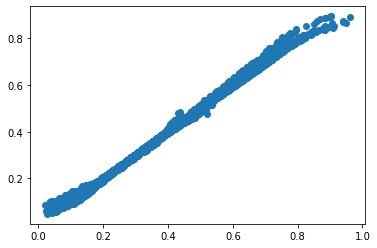

In [ ]:
#Visulize the results
import matplotlib.pyplot as plt
plt.scatter(x=y_test,y=pred)
plt.show()

In [ ]:
Test_number = 225
pred = model.predict(X_test)
print("accuracy is:",np.mean(np.argmax(pred,axis=0)==np.argmax(y_test,axis=0)))


accuracy is: 0.0
